Timoteus Sindhikara - 2301869014 - Fashion dataset - CNN + PCA


In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
#Dataset Fashion MNIST
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

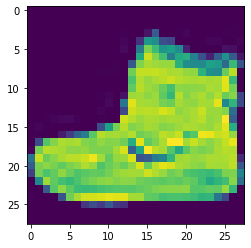

In [3]:
#First image of the dataset
plt.imshow(x_train[0])

In [4]:
#Preprocessing
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train.reshape(60000,-1))
x_test = scaler.fit_transform(x_test.reshape(10000,-1))

#Split training testing
x_test, x_val, y_test, y_val= train_test_split(x_test, y_test, test_size=0.25)

In [5]:
#Add PCA
pca = PCA(n_components=400)
pca = pca.fit(x_train)
x_train = pca.transform(x_train)
x_test = pca.transform(x_test)

In [6]:
#Reshape to match with pca
x_train = x_train.reshape(-1, 20, 20, 1)
x_test = x_test.reshape(-1, 20, 20, 1)

In [7]:
#Encode target
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [8]:
# The Model
model = Sequential()

In [9]:
# Layer of the model
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(20,20,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
#Training process
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 3ms/step - loss: 0.4509 - accuracy: 0.8484 - val_loss: 0.3948 - val_accuracy: 0.8615
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3029 - accuracy: 0.8937 - val_loss: 0.3856 - val_accuracy: 0.8691
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2387 - accuracy: 0.9146 - val_loss: 0.3854 - val_accuracy: 0.8715
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1928 - accuracy: 0.9323 - val_loss: 0.4089 - val_accuracy: 0.8705
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1543 - accuracy: 0.9445 - val_loss: 0.4477 - val_accuracy: 0.8660


In [12]:
#Model Predict
y_pred = model.predict(x_test)
y_pred

array([[4.4494889e-05, 1.3169463e-06, 1.0321115e-05, ..., 2.2647237e-10,
        8.7148123e-08, 5.8856578e-08],
       [5.4054741e-05, 9.9993277e-01, 4.1222588e-06, ..., 7.5957469e-13,
        2.6268032e-09, 5.2339303e-11],
       [6.0807480e-03, 4.7512231e-08, 2.7489764e-06, ..., 4.8558744e-09,
        1.8042943e-03, 2.4897589e-01],
       ...,
       [4.7417572e-07, 1.0532307e-06, 6.5825407e-06, ..., 1.1312280e-08,
        2.7434378e-08, 6.4949934e-09],
       [5.9157197e-04, 6.0885441e-01, 6.6820860e-02, ..., 3.3590686e-06,
        1.6574284e-02, 6.2174367e-04],
       [7.3402768e-01, 4.2068405e-07, 2.1116622e-03, ..., 1.2610199e-07,
        9.8066215e-05, 3.6127039e-06]], dtype=float32)

In [13]:
# Round the prediction (Below 0.5 = 0 else 1)
y_pred = (y_pred>0.5).astype(int)
y_pred

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [14]:
#Accuracy for the model
accuracy_score(y_test, y_pred)

0.8610666666666666